XOR Image Encryption and Decryption


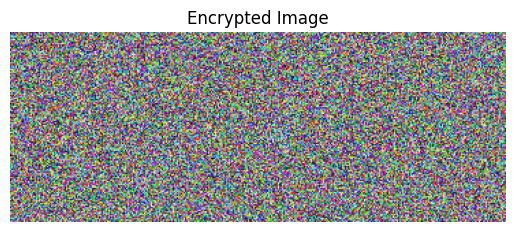

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:696: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def xor_encrypt(image, key):
    image_np = np.array(image)
    key_np = np.array(key)
    key_np = np.resize(key_np, image_np.shape)
    result = np.bitwise_xor(image_np, key_np)
    return result

def xor_decrypt(image, key):
    return xor_encrypt(image, key)  # Decryption is essentially the same as encryption in this XOR cipher

def main():
    print("XOR Image Encryption and Decryption")

    mode = input("Select Mode (Encryption/Decryption): ").lower()

    # Load the image
    image_path = 'image.png'
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Unable to load the image.")
    else:
        # Define a secret key (should be the same length as the number of pixels in the image)
        key = np.random.randint(0, 256, size=image.shape, dtype=np.uint8)

        if mode == "encryption":
            # Encrypt the image
            encrypted_image = xor_encrypt(image, key)
            plt.imshow(cv2.cvtColor(encrypted_image, cv2.COLOR_BGR2RGB))
            plt.title('Encrypted Image')
            plt.axis('off')
            plt.show()

            # Save the encrypted image
            encrypted_image_path = input("Enter the path to save the encrypted image: ")
            cv2.imwrite(encrypted_image_path, encrypted_image)

        elif mode == "decryption":
            # Load the encrypted image
            encrypted_image_path = input("Enter the path to the encrypted image: ")
            encrypted_image = cv2.imread(encrypted_image_path)

            if encrypted_image is None:
                print("Error: Unable to load the encrypted image.")
            else:
                # Decrypt the image
                decrypted_image = xor_decrypt(encrypted_image, key)
                plt.imshow(cv2.cvtColor(decrypted_image, cv2.COLOR_BGR2RGB))
                plt.title('Decrypted Image')
                plt.axis('off')
                plt.show()

                # Save the decrypted image
                decrypted_image_path = input("Enter the path to save the decrypted image: ")
                cv2.imwrite(decrypted_image_path, decrypted_image)

        else:
            print("Error: Invalid mode. Please select either 'Encryption' or 'Decryption'.")

if __name__ == "__main__":
    main()
